# PyTorch Fundamentals: Your First assignment

This notebook provides an introduction to PyTorch, covering tensor initialization, operations, indexing, and reshaping.
Try completing the code and try out different solutions. Feel free to use any LLM of your choice, but remember this is a learning assignment not a evaluation, so blindly copying everything does not help you.

In [1]:
import torch
import numpy as np
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Print versions
print("torch version:", torch.__version__)
print("numpy version:", np.__version__)

torch version: 2.9.0+cpu
numpy version: 2.0.2


## What are Tensors?

Tensor holds a multi-dimensional array of elements of a single data type which is very similar with numpy’s ndarray. When the dimension is zero, it can be called a scalar. When the dimension is 1, it can be called a vector. When the dimension is 2, it can be called a matrix.

- 0-dimensional tensor: A single number (scalar).
- 1-dimensional tensor: A list of numbers (vector).
- 2-dimensional tensor: A table of numbers (matrix).

When the dimension is greater than 2, it is usually called a tensor.

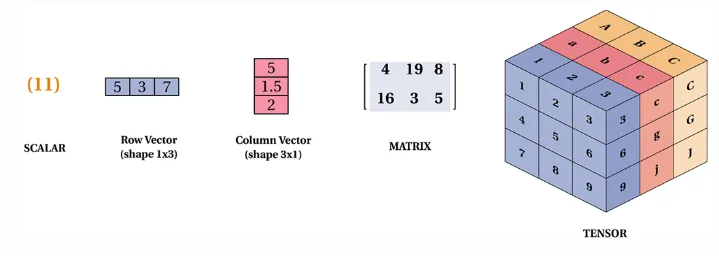

## Tensor Initialization

This code creates a 2×3 PyTorch tensor with float32 data type, assigns it to a specified device (CPU or GPU), and enables gradient tracking for backpropagation.

In [2]:
# Check for CUDA availability and set the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize a 2x3 tensor with requires_grad enabled
my_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32, device=device, requires_grad=True)

print(my_tensor)
print("Data type:", my_tensor.dtype)
print("Device:", my_tensor.device)
print("Shape:", my_tensor.shape)
print("Requires Gradient:", my_tensor.requires_grad)

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)
Data type: torch.float32
Device: cpu
Shape: torch.Size([2, 3])
Requires Gradient: True


## Other Common Tensor Initialization Methods

- **Empty Tensor:** Creates an uninitialized 3×3 tensor (random values).
- **Zeros Tensor:** Creates a 3×3 tensor filled with zeros.
- **Random Tensor:** Generates a 3×3 tensor with random values between 0 and 1.
- **Ones Tensor:** Creates a 3×3 tensor filled with ones.
- **Identity Matrix:** Generates a 4×4 identity matrix (diagonal of ones).
- **Arange Tensor:** Creates a 1D tensor with values from 0 to 4 (step of 1).
- **Linspace Tensor:** Generates 5 evenly spaced values between 0.1 and 1.
- **Normal Distributed Tensor:** Fills a tensor with values from a normal (Gaussian) distribution with mean 0 and std 1.
- **Uniform Distributed Tensor:** Fills a tensor with values from a uniform distribution between 0 and 1.
- **Diagonal Tensor:** Creates a 4×4 diagonal tensor with ones along the diagonal and zeros elsewhere.

In [6]:
import torch
# Create an empty tensor of size 3x3
x = torch.empty(3,3)
print("Empty Tensor:\n", x)

# Create a tensor filled with zeros
x = torch.zeros(3,3)
print("Zeros Tensor:\n", x)

# Create a tensor with random values
x = torch.rand(3,3)
print("Random Tensor:\n", x)

# Create a tensor filled with ones
x = torch.ones(3,3)
print("Ones Tensor:\n", x)

# Create an identity matrix
x = torch.eye(3,3)
print("Identity Matrix:\n", x)

# Create a tensor using arange
x = torch.arange(5)
print("Arange Tensor:\n", x)

# Create a tensor using linspace
x = torch.linspace(0, 1, 5)
print("Linspace Tensor:\n", x)

# Create a tensor with values drawn from a normal distribution
x = torch.empty(1,5).normal_(mean = 0, std = 1)
print("Normal Distributed Tensor:\n", x)

# Create a tensor with values drawn from a uniform distribution
x =  torch.empty(1, 5).uniform_(0, 1)
print("Uniform Distributed Tensor:\n", x)

# Create a diagonal tensor from a tensor of ones
x = torch.diag(torch.ones(4))
print("Diagonal Tensor:\n", x)

Empty Tensor:
 tensor([[-5.6758e+14,  1.2864e-42,  1.0000e+00],
        [ 1.0000e+00,  1.0000e+00,  1.0000e+00],
        [ 1.0000e+00,  1.0000e+00,  1.0000e+00]])
Zeros Tensor:
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
Random Tensor:
 tensor([[0.1748, 0.0896, 0.1337],
        [0.0611, 0.6180, 0.5757],
        [0.0864, 0.0114, 0.8999]])
Ones Tensor:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Identity Matrix:
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
Arange Tensor:
 tensor([0, 1, 2, 3, 4])
Linspace Tensor:
 tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])
Normal Distributed Tensor:
 tensor([[ 0.8856, -0.9051,  2.0408,  0.5096, -1.8612]])
Uniform Distributed Tensor:
 tensor([[0.3491, 0.5817, 0.8639, 0.1620, 0.4059]])
Diagonal Tensor:
 tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])


## Tensor Type Conversion

Creates a tensor with values [0, 1, 2, 3] and demonstrates type conversion to boolean, int16, int64, float16, float32, and float64.

In [7]:
import torch
# Create a tensor and convert its type
tensor = torch.arange(4)
print("Boolean Tensor:", tensor.bool())   # Convert to boolean
print("Short Tensor (int16):", tensor.short())   # Convert to int16
print("Long Tensor (int64):", tensor.long())   # Convert to int64
print("Half Tensor (float16):", tensor.half())   # Convert to float16
print("Float Tensor (float32):", tensor.float())   # Convert to float32
print("Double Tensor (float64):", tensor.double())   # Convert to float64

Boolean Tensor: tensor([False,  True,  True,  True])
Short Tensor (int16): tensor([0, 1, 2, 3], dtype=torch.int16)
Long Tensor (int64): tensor([0, 1, 2, 3])
Half Tensor (float16): tensor([0., 1., 2., 3.], dtype=torch.float16)
Float Tensor (float32): tensor([0., 1., 2., 3.])
Double Tensor (float64): tensor([0., 1., 2., 3.], dtype=torch.float64)


## Converting Between NumPy Arrays and Tensors

PyTorch makes it easy to switch between NumPy arrays and tensors, allowing seamless integration with existing computing workflows.

In [9]:
import torch
import numpy as np

# Create a NumPy array of zeros
np_array = np.zeros((5,5))
print("NumPy Array:\n", np_array)

# Convert NumPy array to PyTorch tensor
tensor = torch.from_numpy(np_array)
print("Tensor from NumPy Array:\n", tensor)

# Convert tensor back to NumPy array
numpy_back = tensor.numpy()
print("Converted Back to NumPy Array:\n", numpy_back)

NumPy Array:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Tensor from NumPy Array:
 tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=torch.float64)
Converted Back to NumPy Array:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## Tensor Mathematics and Comparison Operations

This section explores essential math operations with PyTorch tensors.

- **Addition & Subtraction:** Adds and subtracts two tensors element-wise.  
- **Division:** Uses true division for precise results.  
- **Inplace Operations:** Modifies a tensor directly without creating a new one.  
- **Exponentiation:** Raises each element to a power using `pow()` or `**`.  
- **Comparisons:** Checks conditions like `x > 0` or `x < 0`, returning boolean results.  
- **Dot Product:** Computes the sum of element-wise multiplications between two tensors.

In [ ]:
import torch
# Define two tensors for operations
x = torch.tensor([1, 2, 3])
y = torch.tensor([9, 8, 7])

# Addition
z = x + y
print("Addition Results:", z)

# Addition using .add
z1 = torch.empty(3)
torch.add(x, y, out=z1)
z2 = torch.add(x, y)
print("Addition Results:", z, z1, z2)

# Subtraction
z = x-y 
print("Subtraction Result:", z)

# Division (true division)
z = torch.true_divide(x, y)
print("Division Result:", z)

# Inplace operations
t = torch.ones(3)
print("Before inplace addition:", t)
t.add_(x)
print("After inplace addition:", t)
t += x  # Another inplace addition (note: t = t + x creates a new tensor)
print("After second inplace addition:", t)

# Exponentiation
z = y.pow(2)
print("Exponentiation (pow):", z)
z = y**2
print("Exponentiation (**):", z)

# Comparisons
z = x > 0
print("x > 0:", z)
z = x < 0
print("x < 0:", z)

# Dot product
z = torch.dot(x, y)
print("Dot Product:", z)

## Matrix Multiplication and Batch Operations

Matrix operations are at the heart of deep learning. Let's find out different ways to perform multiplication.

- **Matrix Multiplication:** Uses `@` or `torch.mm()` to perform standard matrix multiplication.  
- **Matrix Exponentiation:** Raises a square matrix to a power using `matrix_power(n)`.  
- **Element-wise Multiplication:** Uses `torch.mul()` or `*` for element-wise multiplication.  
- **Batch Matrix Multiplication:** Uses `torch.bmm()` to multiply batches of matrices efficiently.

In [ ]:
# Matrix multiplication using @ operator and torch.mm
x2 = torch.tensor([[1, 2, 3]])
y2 = torch.tensor([[9, 8, 7]])

z =
print("Matrix Multiplication (@ operator):\n", z)
z =
print("Matrix Multiplication (torch.mm):\n", z)
z =
print("Matrix Multiplication (mm):\n", z)

# Matrix exponentiation: multiplying a matrix with itself 3 times
matrix_exp = torch.rand(5, 5)
print("Matrix multiplied 3 times:\n", matrix_exp @ matrix_exp @ matrix_exp)
print("Matrix power 3:\n", ) #add code here after the comma

# Element-wise multiplication
z = x * y
print("Element-wise Multiplication:", z)

# Batch matrix multiplication
batch = 32
n, m, p = 10, 20, 30
tensor1 = torch.rand((batch, n, m))
tensor2 = torch.rand((batch, m, p))
out_bmm = torch.bmm(tensor1, tensor2)  # Result shape: (batch, n, p)
print("Batch Matrix Multiplication (first batch):\n", out_bmm[0])
print("Shape of batched multiplication result:", )#add code here after the comma

## Broadcasting and Other Useful Operations

Broadcasting allows arithmetic operations on tensors of different shapes. This section also demonstrates additional useful functions.

- **Broadcasting:** Automatically expands smaller tensors to match larger ones in operations.  
- **Summation:** `torch.sum(x, dim=0)` computes sum along a specific dimension.  
- **Min/Max Values:** `torch.max()` and `torch.min()` return the highest and lowest values along a dimension.  
- **Absolute Values:** `torch.abs(x)` gets the element-wise absolute values.  
- **Argmax/Argmin:** `torch.argmax()` and `torch.argmin()` return the index of max/min values.  
- **Mean Calculation:** `torch.mean(x.float(), dim=0)` computes the mean (ensuring float dtype).  
- **Element-wise Comparison:** `torch.eq(x, y)` checks equality between two tensors.  
- **Sorting:** `torch.sort(y, dim=0)` sorts tensor elements and returns indices.  
- **Clamping:** `torch.clamp(x, min=0)` restricts values within a range.  
- **Boolean Operations:** `torch.any(x_bool)` checks if any value is `True`, `torch.all(x_bool)` checks if all are `True`.  

In [ ]:
# Broadcasting example
x1 = torch.rand(5, 5)
x2 = torch.rand(5)
print("Tensor x1:\n", x1)
print("Tensor x2:\n", x2)
print("x1 - x2:\n", x1 - x2)
print("x1 raised to the power of x2:\n", x1 ** x2)

# Sum of tensor elements along dimension 0
sum_x =
print("Sum along dimension 0:", sum_x)

# Maximum and minimum values
value, indices =
print("Max value and index:", value, indices)

value, indices =
print("Min value and index:", value, indices)

# Other operations
#add code here after the comma
print("Absolute values:", )
print("Argmax:", )
print("Argmin:", )
print("Mean (converted to float):", )
print("Element-wise equality (x == y):",)

# Sorting
sorted_y, indices = torch.sort(y, dim=0, descending=False)
print("Sorted y and indices:", sorted_y, indices)

# Boolean operations
x_bool = torch.tensor([1, 0, 1, 1, 1], dtype=torch.bool)
print("Any True:", torch.any(x_bool))
print("All True:", torch.all(x_bool))

## Tensor Indexing

Access and modify tensor elements using indexing, slicing, and advanced indexing.

- **Accessing Rows & Columns:** Use `x[row, :]` for a row and `x[:, col]` for a column.  
- **Slicing:** `x[row, start:end]` extracts a portion of a row.  
- **Modifying Elements:** Directly assign values using `x[row, col] = value`.  
- **Fancy Indexing:** Use a list of indices to select multiple elements at once.  
- **Conditional Indexing:** Extract elements using conditions like `(x < 2) | (x > 8)`.  
- **Finding Even Numbers:** Use `x.remainder(2) == 0` to filter even values.  
- **Conditional Selection with `torch.where()`:** Chooses values based on a condition.  

In [ ]:

#add code here after the commas
# Create a random tensor with shape (batch_size, features)
batch_size = 10
features = 25
x = torch.rand((batch_size, features))

# Access the first row
print("First row of tensor:", )

# Access the second column
print("Second column of tensor:",)

# Access the first 10 elements of the third row
print("First 10 elements of third row:", )

# Modify a specific element (set first element to 100)



## Tensor Reshaping

Learn how to reshape tensors, concatenate them, and change the order of dimensions.

- **Reshape with `view()` & `reshape()`:** Change tensor shape without altering data.  
- **Transpose & Flatten:** `.t()` transposes, `.contiguous().view(-1)` flattens.  
- **Concatenation:** `torch.cat([x1, x2], dim=0/1)` merges tensors along rows/columns.  
- **Flattening:** `.view(-1)` converts a tensor into a 1D array.  
- **Batch Reshaping:** `.view(batch, -1)` keeps batch size while reshaping.  
- **Permute Dimensions:** `.permute(0, 2, 1)` reorders dimensions efficiently.  
- **Unsqueeze for New Dimensions:** `.unsqueeze(dim)` adds singleton dimensions.  

In [ ]:
# Reshape a tensor using view and reshape
x = torch.arange(9)
x_3x3 = x.reshape(3,3)
print("Reshaped to 3x3 using reshape:\n", x_3x3)

# Transpose and flatten the tensor
y = x_3x3.t()
print("Flattened transposed tensor:", y.contiguous().view(9))

# Concatenation example
x1 = torch.rand(2, 5)
x2 = torch.rand(2, 5)
print("shape of Concatenated along dimension 0 (rows):", )
print("shape of Concatenated along dimension 1 (columns):", )

# Flatten the tensor using view(-1)
z =
print("Flattened tensor shape:", z.shape)

# Reshape with batch dimension
batch = 64
x = torch.rand(batch, 2, 5)
print("Reshaped to (batch, -1):", )

# Permute dimensions
z = x.permute(0, 2, 1)
print("Permuted tensor shape:", z.shape)

# Unsqueeze examples (adding new dimensions)
x = torch.arange(10)
print("Original x:", x)
print("x unsqueezed at dim 0:", )
print("x unsqueezed at dim 1:", )
